In [1]:
import sys
sys.path.append("./source")
import bier
from lmmNet import *
import train_onestep
import predict_onestep
import predict_lmmNet

import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
import timeit

# 1. Stable Fixed Point

TODO: generate multiple strains of S. cerevisiae.

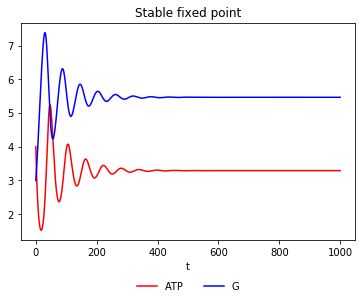

In [2]:
time_points, bier_data = bier.simulate_custom()

plt.plot(time_points, bier_data[:,0], 'r-', label='ATP')
plt.plot(time_points, bier_data[:,1], 'b-', label='G')
plt.xlabel('t')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
plt.title('Stable fixed point')
plt.show()

In [3]:
# function to prepare data for training one-step method
from utils import *

feature_list = [] # here we do not have external time-series or control variables
target_list = ['ATP', 'Glucose']

# now generate and augment the training dataset
df = create_data_numpy(bier_data, time_points, cols=target_list)

Shape of the dataframe is: (5000, 3)


In [4]:
# create a test data
time_points, bier_test = bier.simulate_custom(x0 = [2,1])
test_df = create_data_numpy(bier_test, time_points, cols=target_list)

Shape of the dataframe is: (5000, 3)


ATP


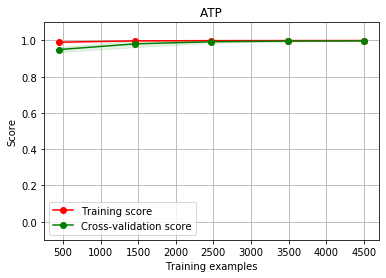

Target: ATP, CV Pearson R2 coefficient: 0.999713
Glucose


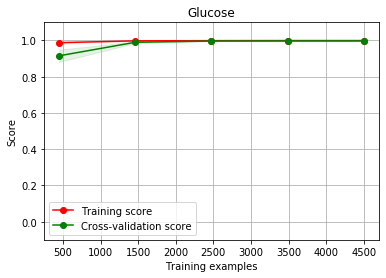

Target: Glucose, CV Pearson R2 coefficient: 0.999665
Average training score: 0.9996887668021883
ATP RMSE: -2.35962523265438e-05 standard deviation: 0.0007157641194239589


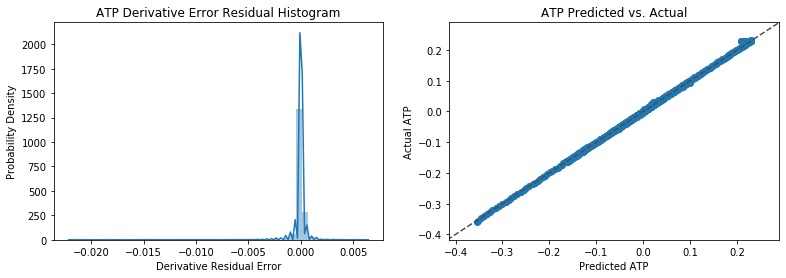

Glucose RMSE: 2.769851721594555e-05 standard deviation: 0.0007150759039555618


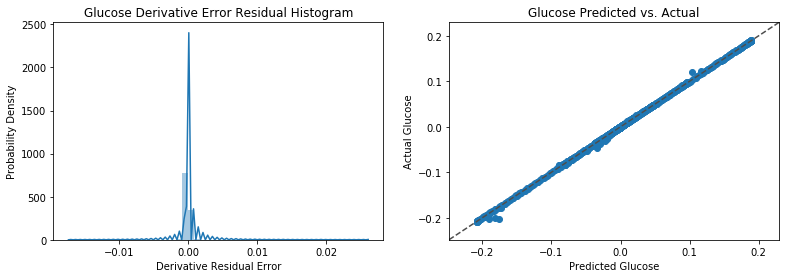

Total Derivative Mean Error: 0.00991980315864821 Error Standard Deviation: 0.01016725408802718


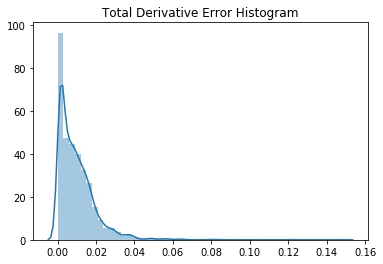

Real data:


,ATP,Glucose
Strain,,
0,4.000000,3.000000
0,3.928296,3.024241
0,3.858022,3.048956
0,3.789168,3.074134
0,3.721725,3.099765
...,...,...
0,3.292680,5.466664
0,3.292680,5.466664
0,3.292680,5.466664


Predicted data:


,ATP,Glucose
Time,,
0.0,4.000000,3.000000
0.2,3.929158,3.022077
0.4,3.859191,3.046622
0.6,3.790370,3.071686
0.8,3.723259,3.097217
...,...,...
999.0,3.287225,5.458395
999.2,3.287041,5.458423
999.4,3.286850,5.458450


./source/predict_onestep.py:217: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  

ML Fit: ATP 0.7948443943760659 RMSE percentage: 7.123964050672822
ML Fit: Glucose 0.709898091047515 RMSE percentage: 5.197870956827208
ML model aggregate error
Average RMSE: 0.7523712427117905
Total percentage error: 6.1609175037500155


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


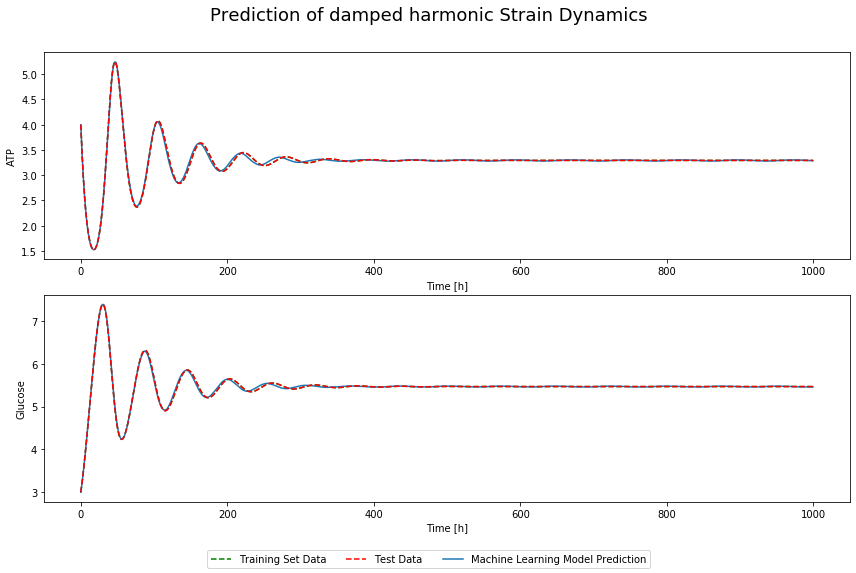

In [7]:
df_train = train_onestep.generate_dataset(df, [0],feature_list, target_list, n_dim=5000)
tp, pred = end_to_end_training(df, df_train, df, feature_list, target_list, (2,1))

# 2. Stable limit cycle

Now let's try to solve the oscillating problem. Make sure to import the necessary libraries.

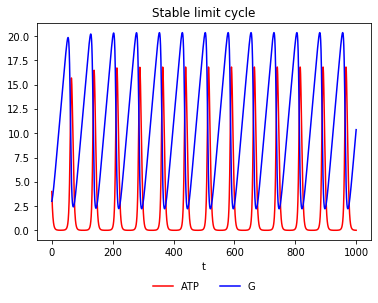

In [6]:
time_points, bier_data = bier.simulate_default()

plt.plot(time_points, bier_data[:,0], 'r-', label='ATP')
plt.plot(time_points, bier_data[:,1], 'b-', label='G')
plt.xlabel('t')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
plt.title('Stable limit cycle')
plt.show()

In [7]:
# function to prepare data for training one-step method
# now generate and augment the training dataset
df = create_data_numpy(bier_data, time_points, cols=target_list)

df.head()

Shape of the dataframe is: (5000, 3)


,ATP,Glucose,Time
Strain,,,
0,4.000000,3.000000,0.0
0,3.799679,3.025018,0.2
0,3.606732,3.052021,0.4
0,3.421157,3.080931,0.6
0,3.242928,3.111674,0.8


In [8]:
# create a test data
time_points, bier_test = bier.simulate_custom(x0 = [2,1], params={'Vin': 0.36, 'k1': 0.02, 'kp':6, 'km':12})
test_df = create_data_numpy(bier_test, time_points, cols=target_list)

Shape of the dataframe is: (5000, 3)


ATP


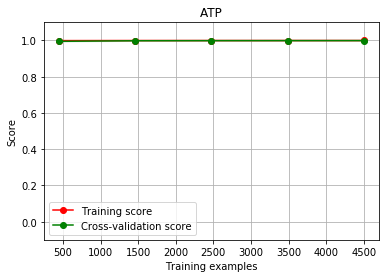

Target: ATP, CV Pearson R2 coefficient: 0.999913
Glucose


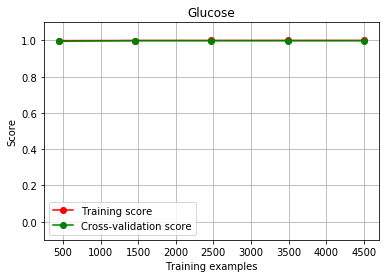

Target: Glucose, CV Pearson R2 coefficient: 0.999943
Average training score: 0.9999280221997784
ATP RMSE: 0.0004666153981341588 standard deviation: 0.007690462184966745


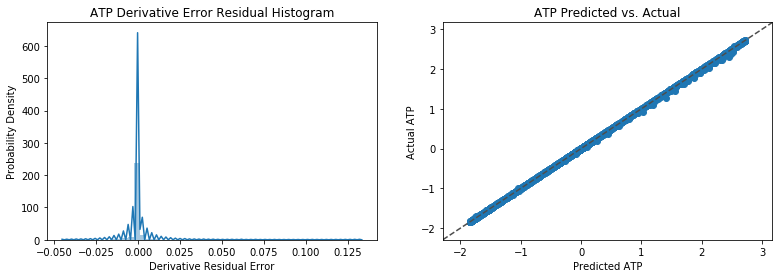

Glucose RMSE: -0.00019161490070103348 standard deviation: 0.005238258878899849


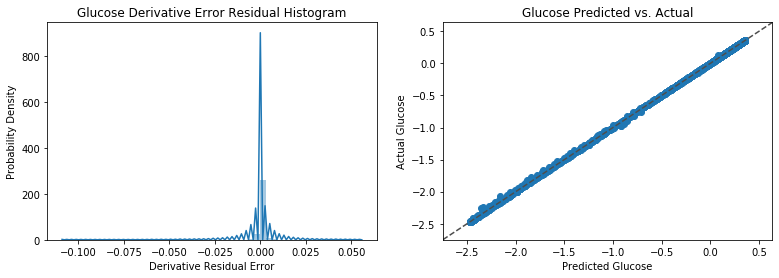

Total Derivative Mean Error: 0.022878033420509057 Error Standard Deviation: 0.03555359457169089


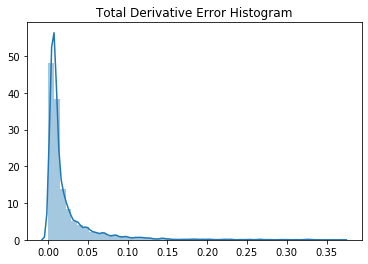

Real data:


,ATP,Glucose
Strain,,
0,4.000000,3.000000
0,3.799679,3.025018
0,3.606732,3.052021
0,3.421157,3.080931
0,3.242928,3.111674
...,...,...
0,0.014159,10.084631
0,0.013893,10.156063
0,0.013641,10.227502


Predicted data:


,ATP,Glucose
Time,,
0.0,4.000000,3.000000
0.2,3.793827,3.023021
0.4,3.595540,3.052513
0.6,3.404195,3.083126
0.8,3.221013,3.114894
...,...,...
999.0,0.014043,10.019910
999.2,0.013759,10.091343
999.4,0.013489,10.162781


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: ATP 12.113367414095496 RMSE percentage: 28.115852472335344
ML Fit: Glucose 10.064743793834115 RMSE percentage: 14.985526259990973
ML model aggregate error
Average RMSE: 11.089055603964805
Total percentage error: 21.55068936616316


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


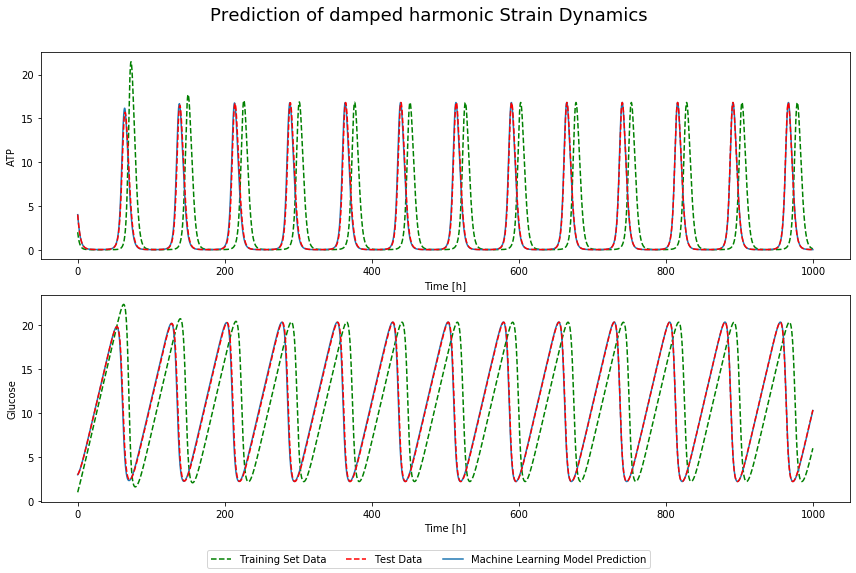

In [10]:
df_train = train_onestep.generate_dataset(df, [0],feature_list, target_list, n_dim=5000)
tp, pred = end_to_end_training(df, df_train, test_df, feature_list, target_list, (2,1))

ATP


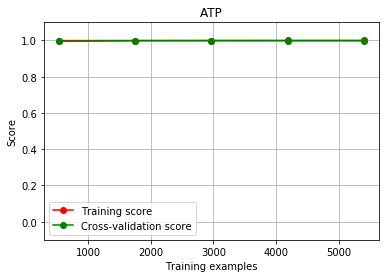

Target: ATP, CV Pearson R2 coefficient: 0.999926
Glucose


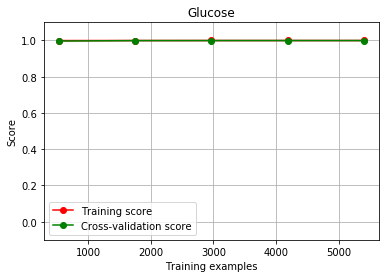

Target: Glucose, CV Pearson R2 coefficient: 0.999963
Average training score: 0.9999446765747215
ATP RMSE: 0.0005709508687739489 standard deviation: 0.007099843252836251


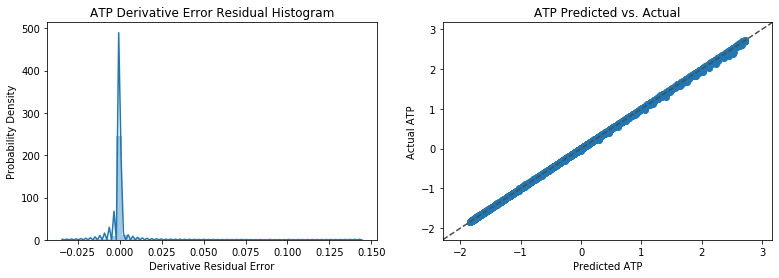

Glucose RMSE: -0.0002984242970205546 standard deviation: 0.004175664619910476


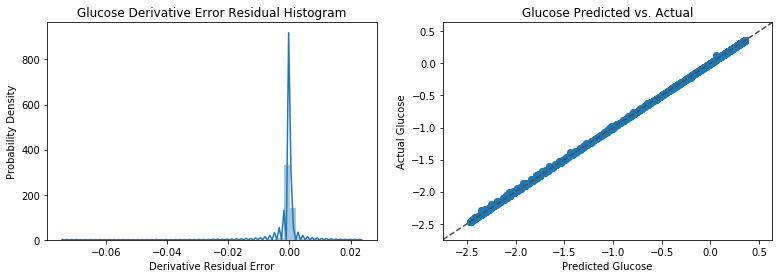

Total Derivative Mean Error: 0.02160940954195094 Error Standard Deviation: 0.03277445538969469


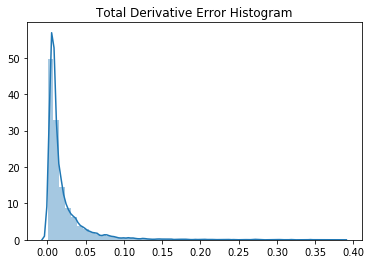

Real data:


,ATP,Glucose
Strain,,
0,4.000000,3.000000
0,3.799679,3.025018
0,3.606732,3.052021
0,3.421157,3.080931
0,3.242928,3.111674
...,...,...
0,0.014159,10.084631
0,0.013893,10.156063
0,0.013641,10.227502


Predicted data:


,ATP,Glucose
Time,,
0.0,4.000000,3.000000
0.2,3.797385,3.022094
0.4,3.601261,3.049943
0.6,3.411139,3.079709
0.8,3.226530,3.111349
...,...,...
999.0,0.013903,10.189342
999.2,0.013671,10.260771
999.4,0.013447,10.332213


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: ATP 11.802599513859214 RMSE percentage: 29.36866522586191
ML Fit: Glucose 9.81583260602327 RMSE percentage: 15.773194180242744
ML model aggregate error
Average RMSE: 10.809216059941242
Total percentage error: 22.57092970305233


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


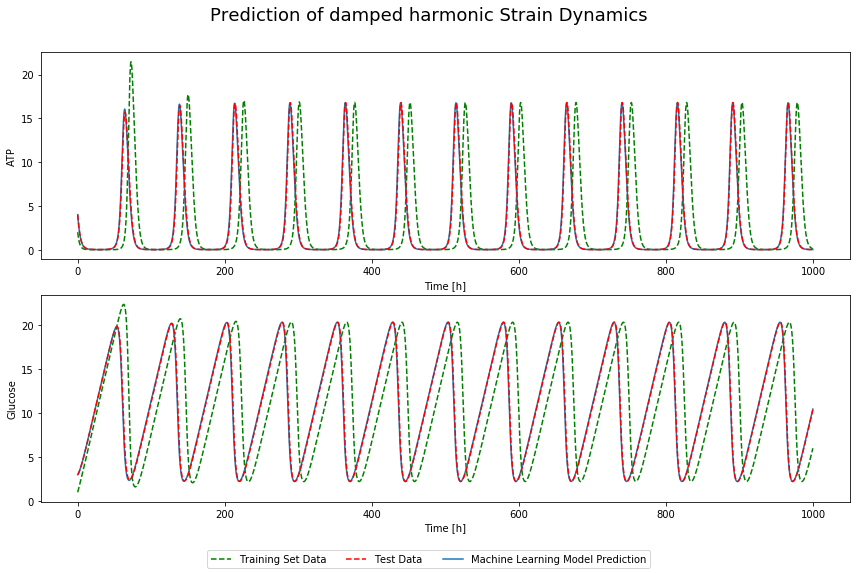

In [9]:
df_train = train_onestep.generate_dataset(df, [0],feature_list, target_list, n_dim=6000)
tp, pred = end_to_end_training(df, df_train, test_df, feature_list, target_list, (2,1))

ATP


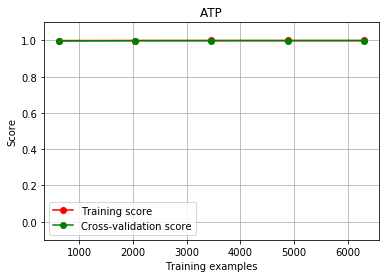

Target: ATP, CV Pearson R2 coefficient: 0.999926
Glucose


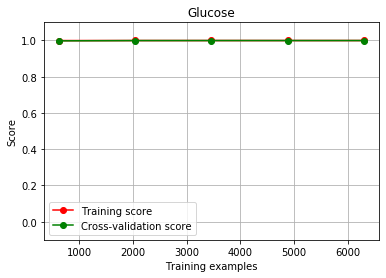

Target: Glucose, CV Pearson R2 coefficient: 0.999961
Average training score: 0.999943415443941
ATP RMSE: 0.00033615202087796493 standard deviation: 0.007124602043067413


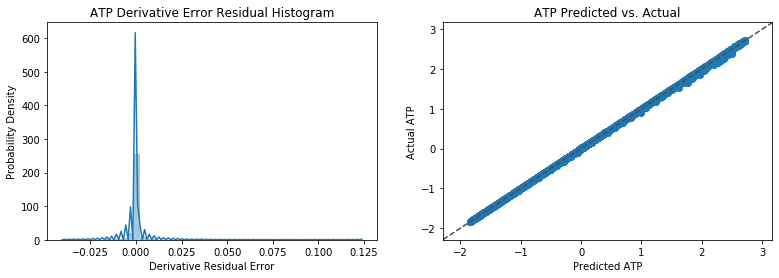

Glucose RMSE: -0.00015985926938537784 standard deviation: 0.004315170923828023


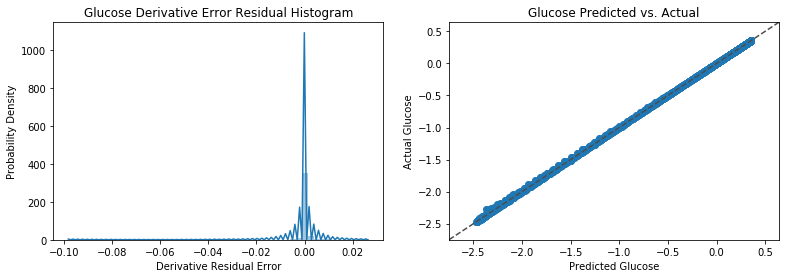

Total Derivative Mean Error: 0.022794067996208024 Error Standard Deviation: 0.03421951115282281


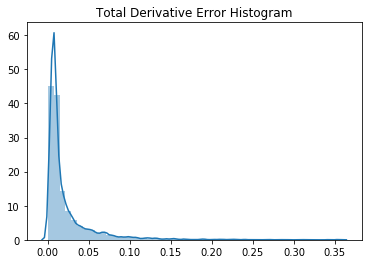

Real data:


,ATP,Glucose
Strain,,
0,4.000000,3.000000
0,3.799679,3.025018
0,3.606732,3.052021
0,3.421157,3.080931
0,3.242928,3.111674
...,...,...
0,0.014159,10.084631
0,0.013893,10.156063
0,0.013641,10.227502


Predicted data:


,ATP,Glucose
Time,,
0.0,4.000000,3.000000
0.2,3.795992,3.026657
0.4,3.599876,3.054502
0.6,3.411276,3.084689
0.8,3.231474,3.117091
...,...,...
999.0,0.013354,10.434125
999.2,0.013145,10.505568
999.4,0.012948,10.577020


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: ATP 19.759544271810935 RMSE percentage: 37.875831182501365
ML Fit: Glucose 16.427684031235884 RMSE percentage: 20.330585998578456
ML model aggregate error
Average RMSE: 18.09361415152341
Total percentage error: 29.103208590539914


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


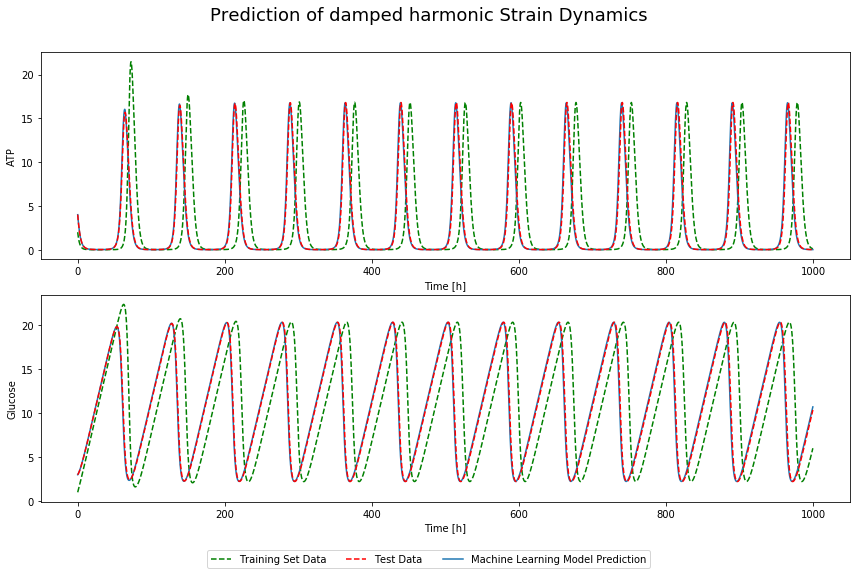

In [11]:
df_train = train_onestep.generate_dataset(df, [0],feature_list, target_list, n_dim=7000)
tp, pred = end_to_end_training(df, df_train, test_df, feature_list, target_list, (2,1))

Text(0.5, 1.0, 'Phase plane of 2D Yeast Glycolytic Oscillator')

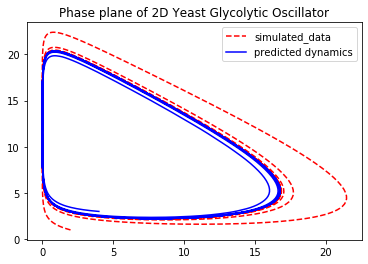

In [14]:
# Phase plane

plt.plot(bier_test[:,0], bier_test[:,1], 'r--', label='simulated_data')
plt.legend()
plt.plot(pred['ATP'], pred['Glucose'], 'b-', label='predicted dynamics')
plt.legend()
plt.title('Phase plane of 2D Yeast Glycolytic Oscillator')

In [15]:
bier_test[:5,:]

array([[2.        , 1.        ],
       [1.85006566, 1.06406026],
       [1.7107021 , 1.12826074],
       [1.58129415, 1.192627  ],
       [1.46124394, 1.25717975]])

# 4. Results

The performance on 2-D Harmonic oscillator is taken from [MultiStep Neural Network](https://maziarraissi.github.io/research/7_multistep_neural_networks/).

In [10]:
# first component MSE
harmonic1_ab = [1.5, 0.031, 0.12, 0.043, 0.012]
harmonic1_am = [0.0088, 0.012, 0.016, 0.0063, 0.011]
harmonic1_bdf = [1.3, 0.0088, 0.013, 0.014, 0.017]

# second component MSE
harmonic2_ab = [1.5, 0.03, 0.097, 0.035, 0.012]
harmonic2_am = [0.0083, 0.01, 0.016, 0.0058, 0.011]
harmonic2_bdf = [1.3, 0.0086, 0.0099, 0.014, 0.015]

In [27]:
def compute_MSE(pred, data, index):
    pred_array = np.array(pred)
    data = np.squeeze(data)
    return np.linalg.norm(data[:,index] - pred_array[:,index], 2)/np.linalg.norm(data[:,index], 2)

Next we compute the MSE from the 2-D Yeast Glycolytic Oscillator results.

In [28]:
# first component
glycolytic1_ab = [compute_MSE(result_dict['AB'+str(i)+'pred'], bier_data, 0) for i in range(1, 6)]
glycolytic1_am = [compute_MSE(result_dict['AM'+str(i)+'pred'], bier_data, 0) for i in range(1, 6)]
glycolytic1_bdf = [compute_MSE(result_dict['BDF'+str(i)+'pred'], bier_data, 0) for i in range(1, 6)]

# second component
glycolytic2_ab = [compute_MSE(result_dict['AB'+str(i)+'pred'], bier_data, 1) for i in range(1, 6)]
glycolytic2_am = [compute_MSE(result_dict['AM'+str(i)+'pred'], bier_data, 1) for i in range(1, 6)]
glycolytic2_bdf = [compute_MSE(result_dict['BDF'+str(i)+'pred'], bier_data, 1) for i in range(1, 6)]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


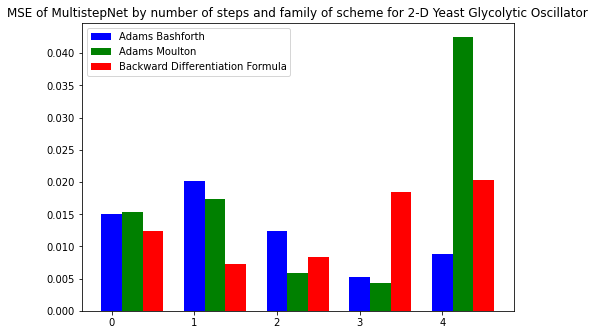

In [44]:
data = [glycolytic1_ab, glycolytic1_am, glycolytic1_bdf]
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

ax.set_xticks(X, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_title('MSE of MultistepNet by number of steps and family of scheme for 2-D Yeast Glycolytic Oscillator')
ax.legend(labels=['Adams Bashforth', 'Adams Moulton', 'Backward Differentiation Formula'])

plt.show()

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


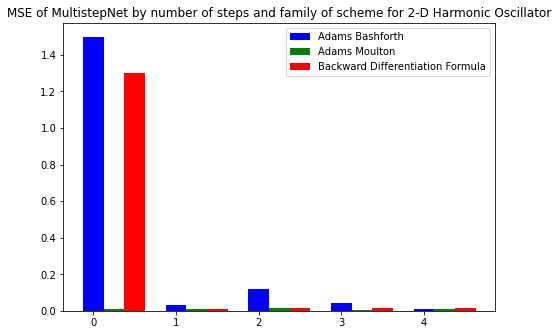

In [43]:
data = [harmonic1_ab, harmonic1_am, harmonic1_bdf]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

ax.set_xticks(X, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_title('MSE of MultistepNet by number of steps and family of scheme for 2-D Harmonic Oscillator')
ax.legend(labels=['Adams Bashforth', 'Adams Moulton', 'Backward Differentiation Formula'])
plt.show()

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


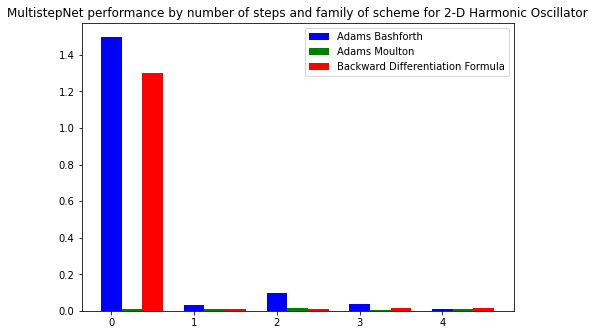

In [41]:
data = [harmonic2_ab, harmonic2_am, harmonic2_bdf]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

ax.set_xticks(X, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_title('MultistepNet performance by number of steps and family of scheme for 2-D Harmonic Oscillator')
ax.legend(labels=['Adams Bashforth', 'Adams Moulton', 'Backward Differentiation Formula'])
plt.show()

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


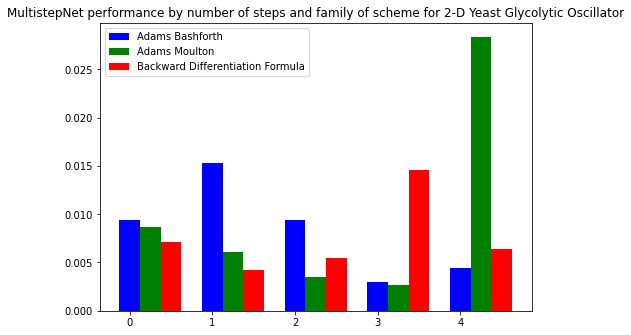

In [42]:
data = [glycolytic2_ab, glycolytic2_am, glycolytic2_bdf]
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

ax.set_xticks(X, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_title('MultistepNet performance by number of steps and family of scheme for 2-D Yeast Glycolytic Oscillator')
ax.legend(labels=['Adams Bashforth', 'Adams Moulton', 'Backward Differentiation Formula'])

plt.show()